In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D


In [ ]:

df = pd.read_csv('/content/oil_gas_factory.csv')
df=df.head(10)


In [ ]:
df

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832
5,6,14.53,4.81,2.69,53.60,0.94,1.67,4395.763259
6,7,13.49,3.60,2.93,63.71,0.80,1.85,4104.400989
7,8,11.58,3.03,3.25,53.00,0.69,1.93,3496.742701
8,9,12.52,2.72,2.43,65.77,0.95,1.98,4025.851153
9,10,13.25,3.94,3.71,66.20,1.14,2.65,4285.026122


In [ ]:
X = df[['Por', 'VR']].values.reshape(-1,2)
Y = df['Prod']


In [ ]:
model = linear_model.LinearRegression()


In [ ]:
model.fit(X,Y)
predicted = model.predict(X)

In [ ]:
print(predicted)

[3982.52015476 3865.43962923 4312.88207108 4385.2247308  4377.30267126
 4005.11963503 3964.28109565 3803.87480775 3913.27899889 4213.36510055]


In [ ]:
r2 = model.score(X, Y)


In [ ]:
print(r2)

0.18824053530405183


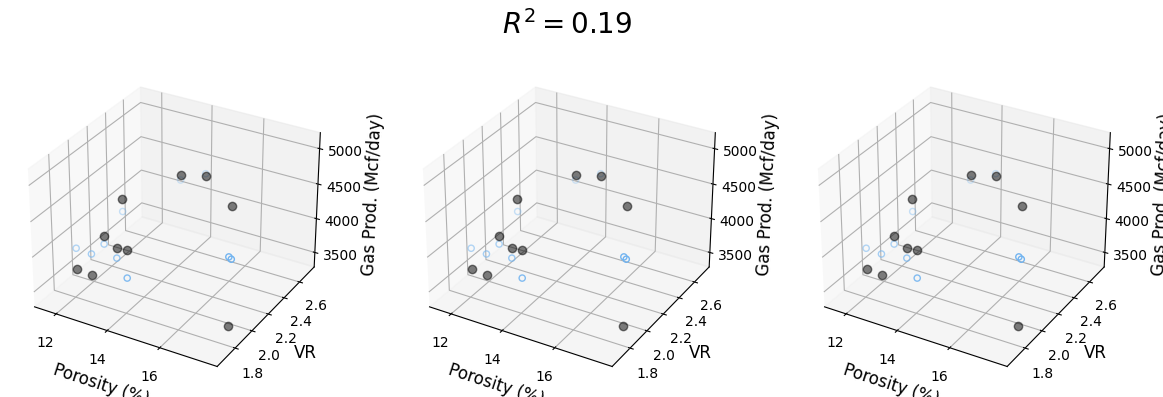

In [ ]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(X[:, 0], X[:, 1], Y, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(X[:, 0], X[:, 1], predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('VR', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

